## **Análisis Univariado**

#### 📘 **Importación de librerías** 
Importamos las librerías que necesitaremos en nuestro análisis **univariado**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from statistics import mode
from scipy.stats import zscore
from scipy.stats import skew
import seaborn as sns

#### 🛜 **Importación del dataset Telco preparado**

Este dataset proviene de la cartera de una empresa de telecomunicaciones que da servicio al Valle y al Tolima y se le realizó una limpieza previa en el archivo `PreparaciónData.ipynb` 

In [3]:
## Cargar datos 
df = pd.read_csv("./data/clientes_limpios.csv", sep=';')

## respaldo - backup 
df_original = df.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165644 entries, 0 to 165643
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   TARIFA_PS                 165644 non-null  object 
 1   ESTADO_CLIENTE            165644 non-null  object 
 2   ESTADO_SUMINISTRO         165644 non-null  object 
 3   ESTADO_FACTURACION        165644 non-null  object 
 4   DEUDA                     165644 non-null  int64  
 5   ANTIGUEDAD_SALDO          165644 non-null  int64  
 6   CICLO                     165644 non-null  int64  
 7   ZONA                      165644 non-null  float64
 8   CLASE_SERVICIO            165644 non-null  object 
 9   ESTRATO                   165644 non-null  int64  
 10  DEPTO                     165644 non-null  object 
 11  MUNICIPIO                 165644 non-null  object 
 12  BARRIO                    165644 non-null  object 
 13  TOTAL_FACTURADO           165644 non-null  f

In [4]:
df.isnull().sum()

TARIFA_PS                   0
ESTADO_CLIENTE              0
ESTADO_SUMINISTRO           0
ESTADO_FACTURACION          0
DEUDA                       0
ANTIGUEDAD_SALDO            0
CICLO                       0
ZONA                        0
CLASE_SERVICIO              0
ESTRATO                     0
DEPTO                       0
MUNICIPIO                   0
BARRIO                      0
TOTAL_FACTURADO             0
FECHA_FACTURACION           0
FECHA_VENCIMIENTO           0
FECHA_ULT_PAGO              0
VALOR_ULT_PAGO              0
TOTAL_FACTURADO_NULL        0
FACTURA_NULL                0
FACTURA_VENCIMIENTO_NULL    0
PAGO_NULL                   0
dtype: int64

---
## **Variables Numericas**

In [5]:
NUMERICAL_FEATURES = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("Numerical Features:", NUMERICAL_FEATURES)

Numerical Features: ['DEUDA', 'ANTIGUEDAD_SALDO', 'CICLO', 'ZONA', 'ESTRATO', 'TOTAL_FACTURADO', 'VALOR_ULT_PAGO', 'TOTAL_FACTURADO_NULL', 'FACTURA_NULL', 'FACTURA_VENCIMIENTO_NULL', 'PAGO_NULL']


#### **DEUDA**

**Contexto:** Variable que indica el monto total adeudado por parte de la cuenta del cliente. Esta variable es nuestro posible target, además de `ANTIGUEDAD_SALDO`

In [6]:
df['DEUDA'].describe()

count    1.656440e+05
mean     1.056890e+05
std      1.215894e+06
min     -5.879690e+05
25%      0.000000e+00
50%      0.000000e+00
75%      1.082670e+05
max      4.612110e+08
Name: DEUDA, dtype: float64

#### **Skewness**

Se revisa que tan inclinada está la distribución

In [7]:
skewness = df['DEUDA'].skew()
print("Skewness:", skewness)

Skewness: 343.0568008821072


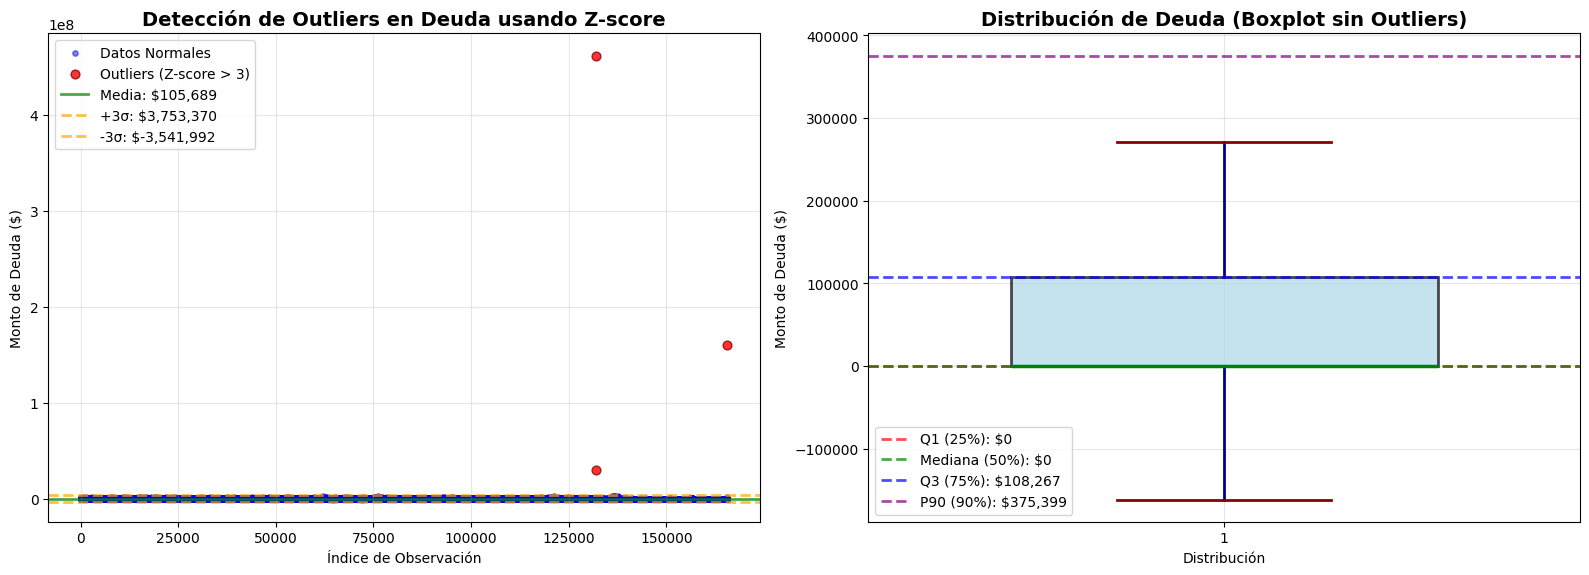

In [8]:
df['zscore'] = zscore(df['DEUDA'])
df['abs_zscore'] = np.abs(df['zscore'])

df_outliers = df[df['abs_zscore'] > 3]
df_normal = df[df['abs_zscore'] <= 3]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

scatter_normal = axes[0].scatter(df_normal.index, df_normal['DEUDA'], color='blue', alpha=0.5, s=15, label='Datos Normales')
scatter_outliers = axes[0].scatter(df_outliers.index, df_outliers['DEUDA'], color='red', alpha=0.8, s=40, label='Outliers (Z-score > 3)', edgecolors='darkred', linewidth=1)
axes[0].set_title('Detección de Outliers en Deuda usando Z-score', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Índice de Observación')
axes[0].set_ylabel('Monto de Deuda ($)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

mean_deuda = df['DEUDA'].mean()
axes[0].axhline(y=mean_deuda, color='green', linestyle='-', linewidth=2, alpha=0.7, label=f'Media: ${mean_deuda:,.0f}')

std_deuda = df['DEUDA'].std()
upper_limit = mean_deuda + 3 * std_deuda
lower_limit = mean_deuda - 3 * std_deuda
axes[0].axhline(y=upper_limit, color='orange', linestyle='--', linewidth=2, alpha=0.7, label=f'+3σ: ${upper_limit:,.0f}')
axes[0].axhline(y=lower_limit, color='orange', linestyle='--', linewidth=2, alpha=0.7, label=f'-3σ: ${lower_limit:,.0f}')

axes[0].legend()
axes[0].grid(True, alpha=0.3)

box_plot = axes[1].boxplot(df['DEUDA'], showfliers=False, patch_artist=True, 
                          widths=0.6, boxprops=dict(linewidth=2),
                          whiskerprops=dict(linewidth=2, color='darkblue'),
                          capprops=dict(linewidth=2, color='darkred'),
                          medianprops=dict(linewidth=2.5, color='green'))

for box in box_plot['boxes']:
    box.set_facecolor('lightblue')
    box.set_alpha(0.7)

percentiles = df['DEUDA'].quantile([0.25, 0.5, 0.75, 0.9])
colors = ['red', 'green', 'blue', 'purple']
labels = ['Q1 (25%)', 'Mediana (50%)', 'Q3 (75%)', 'P90 (90%)']

for i, (p_val, color, label) in enumerate(zip(percentiles, colors, labels)):
    axes[1].axhline(y=p_val, color=color, linestyle='--', linewidth=2, 
                   alpha=0.7, label=f'{label}: ${p_val:,.0f}')

axes[1].set_title("Distribución de Deuda (Boxplot sin Outliers)", fontsize=14, fontweight='bold')
axes[1].set_ylabel("Monto de Deuda ($)")
axes[1].set_xlabel("Distribución")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
#### **Outliers Atípicos y distribución de la deuda**

Al analizar la distribución de la **`DEUDA`** se observan los siguientes puntos:
- **Mediana = 0**
    La mayoría de los registros corresponden a clientes sin deuda (al día) o incluso con saldos negativos (a favor del cliente). Esto concentra gran parte de los datos en torno a cero y dificulta la evaluación de la morosidad.   

- **Q3 (Percentil 75%) = $108.267**  
    El 75% de los clientes deben como máximo este valor, la fuerte presencia de ceros y montos bajos, hace que la distribución esté **sesgada positivamente**.  

- **Max = $461.211.050**
    Existen outliers extremos con deudas muy elevadas, probablemente son clientes corporativos atípicos. Estos casos no representan el comportamiento general de los clientes (residenciales) que queremos estudiar  



---
#### **Filtrar Morosos**
Nos interesa analizar clientes con deudas mayores que cero ya que estos análisis van enfocados en la recuperación de cartera. 

In [9]:
df_morosos = df[df['DEUDA'] > 0]

df_morosos.describe()

,DEUDA,ANTIGUEDAD_SALDO,CICLO,ZONA,ESTRATO,TOTAL_FACTURADO,VALOR_ULT_PAGO,TOTAL_FACTURADO_NULL,FACTURA_NULL,FACTURA_VENCIMIENTO_NULL,PAGO_NULL,zscore,abs_zscore
count,7.842700e+04,78427.000000,78427.000000,78427.00000,78427.000000,7.842700e+04,7.842700e+04,78427.0,78427.0,78427.0,78427.000000,78427.000000,78427.000000
mean,2.242048e+05,3.567521,2.941436,1.59913,2.111989,2.187833e+05,7.545486e+04,0.0,1.0,1.0,0.830569,0.097472,0.131174
std,1.759461e+06,3.476163,1.728587,0.49013,0.889987,6.193764e+05,7.750072e+04,0.0,0.0,0.0,0.375135,1.447056,1.444391
min,1.000000e+00,0.000000,1.000000,1.00000,0.000000,-1.699720e+05,-2.750000e+05,0.0,1.0,1.0,0.000000,-0.086922,0.000007
25%,6.250000e+04,1.000000,1.000000,1.00000,2.000000,6.250000e+04,4.340000e+04,0.0,1.0,1.0,1.000000,-0.035520,0.031491
50%,1.160000e+05,2.000000,3.000000,2.00000,2.000000,1.258000e+05,5.990000e+04,0.0,1.0,1.0,1.000000,0.008480,0.044403
75%,3.192000e+05,6.000000,4.000000,2.00000,3.000000,3.214000e+05,9.775000e+04,0.0,1.0,1.0,1.000000,0.175601,0.175601
max,4.612110e+08,33.000000,7.000000,3.00000,6.000000,1.598470e+08,2.217843e+06,0.0,1.0,1.0,1.000000,379.232805,379.232805


#### **Filtrar Outliers superiores**

Para filtrar aquellos valores atípicos extremadamente grandes, realizamos el rango intercuartílico IQR y así tener una muestra más representativa.

In [10]:
Q1 = df_morosos['DEUDA'].quantile(0.25)
Q3 = df_morosos['DEUDA'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR

df_sin_outliers = df_morosos[df_morosos['DEUDA'] <= limite_superior]

In [11]:
df_sin_outliers.describe()

,DEUDA,ANTIGUEDAD_SALDO,CICLO,ZONA,ESTRATO,TOTAL_FACTURADO,VALOR_ULT_PAGO,TOTAL_FACTURADO_NULL,FACTURA_NULL,FACTURA_VENCIMIENTO_NULL,PAGO_NULL,zscore,abs_zscore
count,75882.000000,75882.000000,75882.000000,75882.000000,75882.000000,7.588200e+04,7.588200e+04,75882.0,75882.0,75882.0,75882.000000,75882.000000,75882.000000
mean,190687.557431,3.308360,2.919915,1.598324,2.111304,1.959342e+05,7.628560e+04,0.0,1.0,1.0,0.837629,0.069906,0.104738
std,169895.411739,3.045976,1.719525,0.490240,0.881255,1.742790e+05,7.760650e+04,0.0,0.0,0.0,0.368793,0.139729,0.115936
min,1.000000,0.000000,1.000000,1.000000,0.000000,-1.699720e+05,-2.750000e+05,0.0,1.0,1.0,0.000000,-0.086922,0.000007
25%,62500.000000,1.000000,1.000000,1.000000,2.000000,6.250000e+04,4.500000e+04,0.0,1.0,1.0,1.000000,-0.035520,0.031162
50%,111800.000000,2.000000,3.000000,2.000000,2.000000,1.250000e+05,5.990000e+04,0.0,1.0,1.0,1.000000,0.005026,0.044403
75%,288000.000000,5.000000,4.000000,2.000000,3.000000,2.964000e+05,9.925450e+04,0.0,1.0,1.0,1.000000,0.149940,0.149940
max,704160.000000,24.000000,6.000000,2.000000,6.000000,1.432130e+06,2.217843e+06,0.0,1.0,1.0,1.000000,0.492208,0.492208


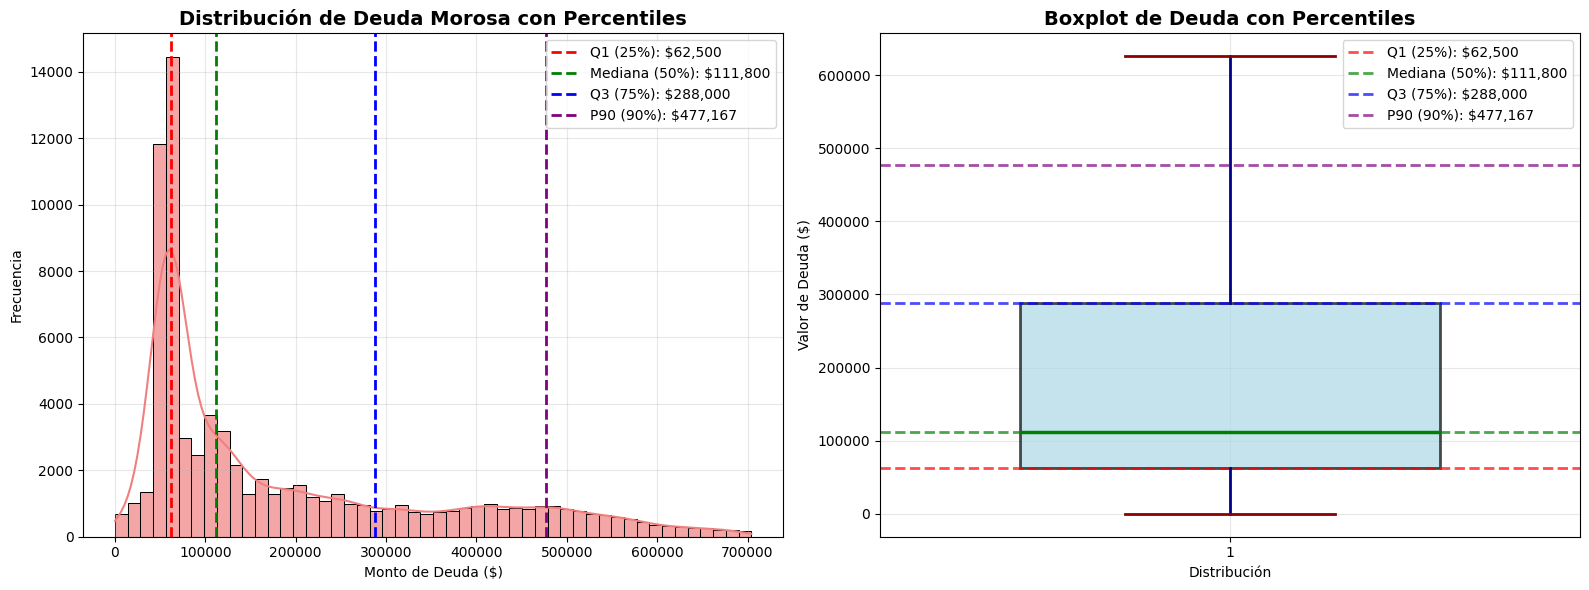

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(df_sin_outliers['DEUDA'], kde=True, bins=50, ax=axes[0], 
             color='lightcoral', alpha=0.7)

percentiles = df_sin_outliers['DEUDA'].quantile([0.25, 0.5, 0.75, 0.9])
colors = ['red', 'green', 'blue', 'purple']
labels = ['Q1 (25%)', 'Mediana (50%)', 'Q3 (75%)', 'P90 (90%)']

for i, (p_val, color, label) in enumerate(zip(percentiles, colors, labels)):
    axes[0].axvline(p_val, color=color, linestyle='--', linewidth=2, label=f'{label}: ${p_val:,.0f}')

axes[0].set_title('Distribución de Deuda Morosa con Percentiles', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Monto de Deuda ($)')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

box_plot = axes[1].boxplot(df_sin_outliers['DEUDA'], showfliers=False, patch_artist=True, 
                          widths=0.6, boxprops=dict(linewidth=2),
                          whiskerprops=dict(linewidth=2, color='darkblue'),
                          capprops=dict(linewidth=2, color='darkred'),
                          medianprops=dict(linewidth=2.5, color='green'))

for box in box_plot['boxes']:
    box.set_facecolor('lightblue')
    box.set_alpha(0.7)

for i, (p_val, color, label) in enumerate(zip(percentiles, colors, labels)):
    axes[1].axhline(y=p_val, color=color, linestyle='--', linewidth=2, 
                   alpha=0.7, label=f'{label}: ${p_val:,.0f}')

axes[1].set_title("Boxplot de Deuda con Percentiles", fontsize=14, fontweight='bold')
axes[1].set_ylabel("Valor de Deuda ($)")
axes[1].set_xlabel("Distribución")
axes[1].grid(True, alpha=0.3)
axes[1].legend()
plt.tight_layout()
plt.show()

#### **Skewness**

Se revisa de nuevo al distribución de los datos, que sigue presentando un sesgo a la derecha pero ya es más aceptable. 

In [14]:
skewness_sin_outliers = df_sin_outliers['DEUDA'].skew()
print(skewness_sin_outliers)

1.1396287705439687


---
#### **Distribución de la Deuda Morosa**

**Outliers atípicos**  
Se aplicó el **Rango intercuartílico (IQR)** para identificar y eliimnar los valores de deuda atípicos, principalmente de clientes corporativos grandes que no son el foco de la recuperación de cartera. Al realizar este filtro, se evidencia la siguiente distribución: 

- **Mediana: $111.800**  
La deuda típica de los clientes se encuentra alrededor de este valor. 

- **Q1: $62.500**  
La mayor concentración de clientes tiene deudas cercanas o menores a $62.500, correspondiente al primer cuartil (Q1).

- **Sesgo a la derecha (Skewness > 0)**  
Aunque la distribución ya no está dominada por valores extremos, sigue existiendo un ligero sesgo hacia deudas más altas, indicando que algunos clientes tienen deudas mayores que la mayoría, pero sin afectar la visión general de la deuda morosa.